In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy
from scipy import interpolate
import pandas as pd
import itertools
from root_numpy import root2array, root2rec, tree2rec, array2root
import ROOT
from ROOT import geo2d,cv
geo2d.load_pyutil
from ROOT.cv import Point_ as Vector2D
DTYPE='float'
pdraw = geo2d.PyDraw()

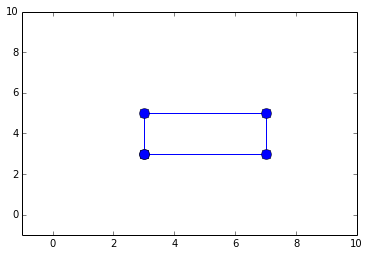

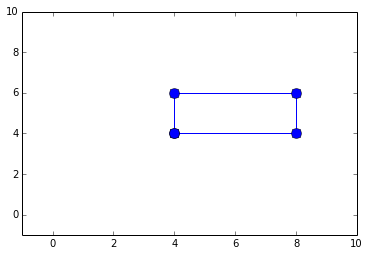

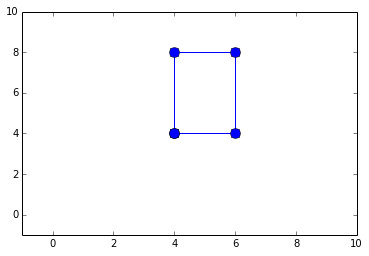

In [2]:
def plot_box(box,xmin=None,xmax=None,ymin=None,ymax=None,points=None):
    data_x,data_y = pdraw.rect(box)
    data_x = np.append(data_x,data_x[0])
    data_y = np.append(data_y,data_y[0])

    if points:
        plt.plot(points[0],points[1],color='r',marker='o',linestyle='',markersize=5)
    plt.plot(data_x,data_y,marker='o',markersize=10)

    if xmin is None: xmin = data_x.min()
    if ymin is None: ymin = data_y.min()
    if xmax is None: xmax = data_x.max()
    if ymax is None: ymax = data_y.max()
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()
    

geo2d.load_pyutil
b=cv.Rect_(DTYPE)()
(b.x, b.y, b.width, b.height) = (3.,3.,4.,2.)
plot_box(b,-1,10,-1,10)
(b.x, b.y) = (4., 4.)
plot_box(b,-1,10,-1,10)
(b.width,b.height) = (2.,4.)
plot_box(b,-1,10,-1,10)

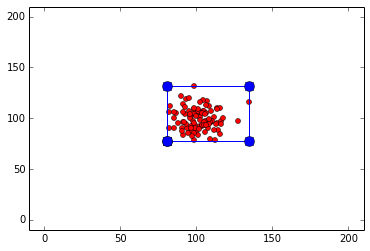

In [3]:
npts=100
data_x = np.random.normal(100, 10, npts)
data_y = np.random.normal(100, 10, npts)
stdx = ROOT.std.vector(DTYPE)(npts)
stdy = ROOT.std.vector(DTYPE)(npts)
for i in xrange(npts):
    stdx[i] = data_x[i]
    stdy[i] = data_y[i]

pts  = geo2d.Vector2DArray(DTYPE)(stdx,stdy)
alg=geo2d.AlgoConvexHull(DTYPE)()
plot_box(alg.test(pts),-10,210,-10,210,(data_x,data_y))
